## 2.5 Quantengatter
Im Kapitel Cbit haben wir die Mathematik von Matrizen und deren Auswirkungen angeschaut. Nun kommen wir zu deren Implementation, den Quantengattern. Der Quantencomputer benutzt wie auch der klassische Computer Gatter, um die Bits zu manipulieren. Bei beiden Computerarchitekuren gilt: Man möchte ein Gleichgewicht zwischen effizienter Berechnungen und realitätsnahe Implementation finden. Der klassische Computer ist normalerweise mit den sieben Gatter NOT, AND, NAND, OR, NOR, XOR, NXOR realisiert, könnte aber auch mit einem einzigen Gatter z. B. mit dem NOR-Gatter (Effizienz leidet) oder mit 100 verschiedenen Alex-Gattern (Ingineur leidet) implementiert werden. Es hat sich ergeben, dass der klassischen Computer mit den sieben Gatter sehr gut funktioniert. Nun stellt sich die Frage, mit wievielen Gattern der Quantencomputer am besten funktioniert? Und wie sehen sie aus?

Ein Quantengatter arbeitet mit quantenmechanischen Systemen wie z. B. mit dem Spin eines Elektrons. Auch wenn ihr Name es suggeriert, stellen Quantengatter in der Regel keine physikalischen Bauelemente wie Transistoren dar. Ein Quantengatter ist vielmehr eine zeitlich steuerbare Wechselwirkung der Qubits untereinander oder mit der Umgebung. Wie bereits bei den Qubits werden auch die Quantengatter abstrahiert. Aus mathematischer Sicht ist ein Quantengatter eine unitäre Transformation $U$ , welche auf einen Zustand $\psi_i$  der Qubits angewendet wird und den Zustand $U*\psi = \psi_{i+1}$ erzeugt.
Die Definitionen der Matrizen aus den Kapitel Cbits doch also noch zu gebrauchen.

### 2.5.1 Komplexe Zahlen
Der Gesamtzustand einer Quantenberechnung setzt sich aus komplexen Zahlen zusammen, sogennante Amplituden. Die Amplituden können mit Hilfe von Pfeilen (Richard Feynman) und eines quadratischen Diagramms dargestellt werden, sodass die verschiedenen Komponenten einer komplexen Zahl visualisiert:

<img src="src_picture\square-diagram.gif" alt="drawing" width="130"/>

Der Pfeil zeigt auf den komplexen Wert der Amplitude. Dabei ist:
- der Realteil der X-Offset des Pfeils 
- der Imaginärteil der Y-Offset des Pfeils
- die Größe die Länge des Pfeils
- die Phase die Richtung des Pfeils 
- die Wahrscheinlichkeit eines Zustands (quadrierte Amplitude) die eusgefüllte Fläche

Das Ergebnis einer __Addition__ ist somit der resultierende Vektor:  

<img src="src_picture\adding-complex-number.gif" alt="drawing" width="300"/>

Um zwei komplexe Zahlen zu __multiplizieren__, werden ihre Phasen addieren und ihre Grössen multiplizieren:

<img src="src_picture\complex-product.gif" alt="drawing" width="300"/>

### 2.5.2 Pauli-X-Gatter
Der Pauli-X-Gatter wirkt auf ein einziges Qubit und entspricht dem NOT-Operator aus (1.8). Er bewirkt eine Drehung der Blochkugel um die X-Achse.

- Matrixdarstellung:

$$X = \left(\begin{array}{cc} 0 &1\\1&0\\\end{array}\right) \,\,\,\,\,\,\,\,(1.8)$$

- Vektordarstellung:


- Gatterdarstellung:

<img src="src_picture\X-Gate.gif" alt="drawing" width="200"/>

Der Input befindet sich im On-Zustand, wodurch die erste Spalte der Matrix als Ausgang gewählt wird, was dazu führt, dass sich der Output im Off-Zustand befindet. Wäre der Input im Off-Zustand gewesen, dann wäre die zweite Spalte der Matrix ausgewählt worden und der Output wäre im On-Zustand gewesen.

### Hadamard-Gatter
Auch das berühmte Hadamard-Gate (1.50), welches oft zum Beginn eines Algorithmus angewendet wird um die Zustände in Superposition zu bringen, kann als Grafik dargestellt werden.

$$H = \frac{1}{\sqrt{2}}*\left(\begin{array}{cc} 1&1\\1&-1\end{array}\right) \,\,\,\,\,\,\,\,(1.50)$$

<img src="src_picture\H-Gate.gif" alt="drawing" width="500"/>

Zu bemerken ist, dass der On-Anfangszustand in blau und der Off-Anfangszustand in rot, nachdem sie in Superposition gebracht worden sind, zwar beide die gleiche Wahrscheinlichkeitsverteilung haben, jedoch der untere Pfeil jeweils um 180° in die entgegengesetzte Richtung zeigt. Würde man also nach der ersten $H$-Operation messen, so würde man beides mal das gleiche Ergebnis erhalten. Der ursprüngliche Zustand ist in der Phase codiert.

Komplexer wird es mit mehreren Qubits. Angenommen, wir wollen ein Hadamard-Gate auf einen einzelnes Qubit in einer n-Qubitschlatung anwenden. Wir haben eine $2\times2$-Matrix, aber jede Operation auf einer n-Qubitschaltung muss durch $2^n\times2^n$-Matrizen dargestellt werden. Die Natur verhält isch automatisch so, doch wie simuliert man solche Gleichungen?

Jeder globale Zustand beinhaltet den Zustand des Qubits, das wir beeinflussen wollen. Wenn wir ein einzelnes Qubit manipulieren wollen, dann müssen wir jeden globalen Zustand manipulieren. Das wird erreicht, indem die gewünschte  $2\times 2$-Matrix für jede Kombination von Zuständen der anderen Qubits angewendet wird.

Das folgende Diagramm zeigt eine 2-Qubitschaltung, die das Hadamard-Gatter zuerst auf das eine und danach auf das andere Qubit anwendet, um so beide Qubits in die Superposition zu bringen:

<img src="src_picture\H2-Gate.gif" alt="drawing" width="550"/>

Die $H$-Matrizen können auch zu einem Gatter zusammengefasst werden:

<img src="src_picture\H2-H2-Gate.gif" alt="drawing" width="500"/>


# Der Grover-Algorithmus

### Erste Ausführung auf einem Quantencomputer: Der Bell-Zustand
Um mit der Syntax vertraut zu werden, erstellen wir einen simplen Bell-Zustand. Eine Übersicht die Basic-Befehle gibt es unter [Qiskit-Tutorial](https://github.com/Qiskit/qiskit-tutorial). Qiskit hat einige gute Tutorials dabei.

Den [Bell-Zustand]() haben wir ja theoretisch bereits kennengelernt. Wir wollen nun prüfen, ob die Qbits auch in der Praxis verschränkt sind und sich dementsprechend verhalten. Zuerst werden wir den Code auf der Aer-Simulation und danach auf einem echten Quantencomputer von IBM laufen lassen. 

Für den Bell-Zustand benötigen wir nur folgende Elemente:
- QuantumRegister: Hier werden unsere Qbits platziert
- ClassicalRegister: Hier werden unsere Cbits platziert
- QuantumCircuit: Wir mappen die Qbits auf die Cbits, indem wir eine Messung durchführen. In diesem Moment verändern wir die Wirklichkeit und die Elektronen müssen sich "entscheiden", was uns dann das Ergebnis als WKS-Verteilung ausgibt.
- Ein Hadamard-Gate
- Ein cNOT-Gate

Wir setzen q0 in Superposition per H-Gate. Danach wählen wir per cNOT-Gate q0 als Statebit und q1 als Targetbit.
Um einen Circuit mit zwei Qbits zur erzeugen und auf einem Simulator, der in Qiskit enthalten ist, auszuführen, reicht folgender Code:

# Bell-Zustand mit Simulation-Backend Aer

Aer backends:  [<QasmSimulatorPy('qasm_simulator_py') from Aer()>, <StatevectorSimulatorPy('statevector_simulator_py') from Aer()>, <UnitarySimulator('unitary_simulator') from Aer()>]
First simulation:  COMPLETED
Output:  {'00': 1, '11': 1}
Second simulation:  COMPLETED
Output:  {'00': 494, '11': 506}


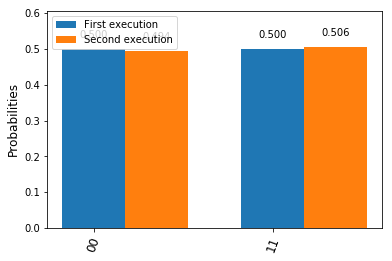

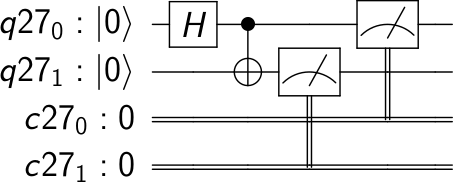

In [29]:
# Import the Qiskit SDK
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import available_backends, execute, Aer
from qiskit.tools.visualization import plot_histogram, circuit_drawer, plot_state

# Create a Quantum Register with 2 qubits.
q = QuantumRegister(2)
# Create a Classical Register with 2 bits.
c = ClassicalRegister(2)
# Create a Quantum Circuit
qc = QuantumCircuit(q, c)

# Add a H gate on qubit 0, putting this qubit in superposition.
qc.h(q[0])
# Add a CX (CNOT) gate on control qubit 0 and target qubit 1, putting
# the qubits in a Bell state.
qc.cx(q[0], q[1])
# Add a Measure gate to see the state.
qc.measure(q, c)

# See a list of available local simulators
print("Aer backends: ", Aer.backends())
backend_sim = Aer.get_backend('qasm_simulator')

# Compile and run the Quantum circuit on a simulator backend
sim_result1 = execute(qc, backend_sim, shots=2).result()
sim_result2 = execute(qc, backend_sim, shots=1000).result()
counts1 = sim_result1.get_counts(qc)
counts2 = sim_result2.get_counts(qc)

# Show the results as text and plot
print("First simulation: ", sim_result1)
print("Output: ", counts1)
print("Second simulation: ", sim_result2)
print("Output: ", counts2)
legend = ['First execution', 'Second execution']
plot_histogram([counts1,counts2], legend=legend)
circuit_drawer(qc)

Dieser Output sagt uns, das unsere 1000 Shots ziemlich gleichverteilt sind. Sprich wenn q0 = 0 dann ist zeitgleich q1 = 0 und wenn q0 = 1 dann q1 = 1.

Nun wollen wir aber endlich unseren Code des Bell-Zustands auf einem echten Quantencomputer compilieren:

# Bell-Zustand mit IBMQ-Backend

Remote backends:  [<IBMQBackend('ibmqx4') from IBMQ()>, <IBMQBackend('ibmq_16_melbourne') from IBMQ()>, <IBMQBackend('ibmq_qasm_simulator') from IBMQ()>]
Running on current least busy device:  ibmqx4
First experiment:  COMPLETED
Output:  {'00': 472, '01': 81, '10': 60, '11': 411}
Second experiment:  COMPLETED
Output:  {'00': 448, '01': 62, '10': 61, '11': 453}


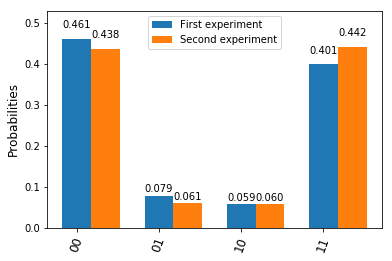

In [16]:
# Import the Qiskit
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, QISKitError
from qiskit import execute, IBMQ, Aer
from qiskit.backends.ibmq import least_busy
from qiskit.tools.visualization import plot_histogram, circuit_drawer, plot_state

# Authenticate for access to remote backends
try:
    import Qconfig
    IBMQ.load_accounts()
except:
    print("""WARNING: There's no connection with the API for remote backends.
             Have you initialized a file with your personal token?
             For now, there's only access to local simulator backends...""")

try:
    # Create a Quantum Register with 2 qubits.
    q = QuantumRegister(2)
    # Create a Classical Register with 2 bits.
    c = ClassicalRegister(2)
    # Create a Quantum Circuit
    qc = QuantumCircuit(q, c)

    # Add a H gate on qubit 0, putting this qubit in superposition.
    qc.h(q[0])
    # Add a CX (CNOT) gate on control qubit 0 and target qubit 1, putting
    # the qubits in a Bell state.
    qc.cx(q[0], q[1])
    # Add a Measure gate to see the state.
    qc.measure(q, c)

    # see a list of available remote backends
    ibmq_backends = IBMQ.backends()

    print("Remote backends: ", ibmq_backends)
    # Compile and run the Quantum Program on a real device backend
    try:
        least_busy_device = least_busy(IBMQ.backends(simulator=False))
        print("Running on current least busy device: ", least_busy_device)

        #running the job twice and get counts
        result_exp1 = execute(qc, least_busy_device, shots=1024, max_credits=10).result()
        result_exp2 = execute(qc, least_busy_device, shots=1024, max_credits=10).result()
        counts01 = result_exp1.get_counts(qc)
        counts02 = result_exp2.get_counts(qc)

        # Show the results
        print("First experiment: ", result_exp1)
        print("Output: ", counts01)
        print("Second experiment: ", result_exp2)
        print("Output: ", counts02)
        legend = ['First experiment', 'Second experiment']
        plot_histogram([counts01,counts02],  legend=legend)
    except:
        print("All devices are currently unavailable. Try again later.")

except QISKitError as ex:
    print('There was an error in the circuit!. Error = {}'.format(ex))

Auch der Quantencomputer gibt uns für 00 und 11 die grösste WSK aus, jedoch haben auch die anderen Zustände eine WSK. Das ist nachvollziehbar, da zu Beginn der Initialisierung jeder Zustand die gleiche WSK hat, danach beim Versetzen in den Bell-Zustand wachsen die Verschränkten Zustände und die anderen sinken, jedoch niemals auf 0.

# Grover mit 2 Qubits und Orakel = 11

Simulation:  COMPLETED
Output:  {'10': 1000}


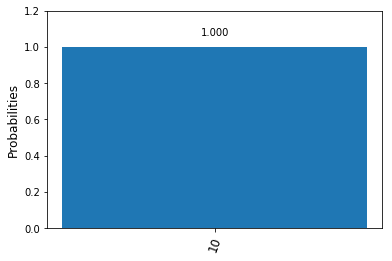

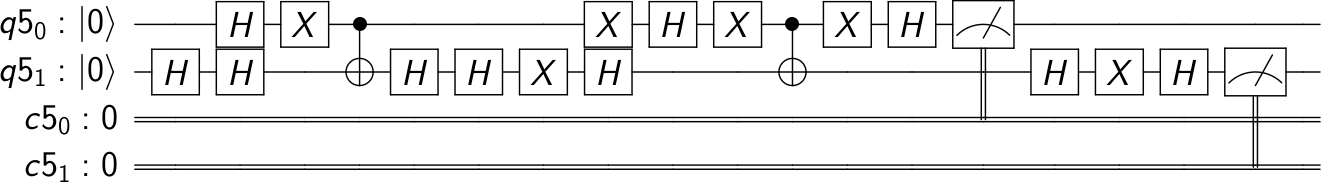

In [7]:
# Import the Qiskit SDK.
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import available_backends, execute, Aer
from qiskit.tools.visualization import plot_histogram, circuit_drawer, plot_state
# Define the number of n-qbits.
n = 2
# Create a Quantum Register with n-qbits.
q = QuantumRegister(n)
# Create a Classical Register with n-bits.
c = ClassicalRegister(n)
# Create a Quantum Circuit
qc = QuantumCircuit(q, c)
# Add H-gate to get superposition.
qc.h(q[0])
qc.h(q[1])

# Apply the oracle 11.
qc.x(q[0])
qc.h(q[1])
qc.cx(q[0],q[1])
qc.x(q[0])
qc.h(q[1])

qc.h(q[0])
qc.h(q[1])
qc.x(q[0])
qc.x(q[1])
qc.h(q[1])
qc.cx(q[0],q[1])
qc.h(q[1])
qc.x(q[0])
qc.x(q[1])
qc.h(q[0])
qc.h(q[1])

# Measure qubit to bit. .
qc.measure(q, c)
# Get Aer backend.
backend_sim = Aer.get_backend('qasm_simulator')
# Compile and run the Quantum circuit on a simulator backend.
sim_result1 = execute(qc, backend_sim, shots=1000).result()
counts1 = sim_result1.get_counts(qc)
# Show the results as text and plot.
print("Simulation: ", sim_result1)
print("Output: ", counts1)
plot_histogram(counts1)
circuit_drawer(qc)

# Grover mit 4 Qubits und Orakel = 10

Aer backends:  [<QasmSimulatorPy('qasm_simulator_py') from Aer()>, <StatevectorSimulatorPy('statevector_simulator_py') from Aer()>, <UnitarySimulator('unitary_simulator') from Aer()>]
First simulation:  COMPLETED
Output:  {'0000': 35, '0010': 463, '0011': 35, '1011': 48, '0101': 39, '1001': 27, '1101': 46, '0001': 40, '1111': 32, '1100': 41, '0100': 41, '0111': 33, '1110': 31, '1000': 28, '0110': 33, '1010': 28}
Second simulation:  COMPLETED
Output:  {'0010': 473, '0100': 44, '1011': 27, '0111': 32, '1111': 39, '1100': 38, '0011': 43, '1110': 28, '1000': 32, '1001': 35, '0101': 33, '0001': 34, '0110': 37, '0000': 32, '1010': 32, '1101': 41}


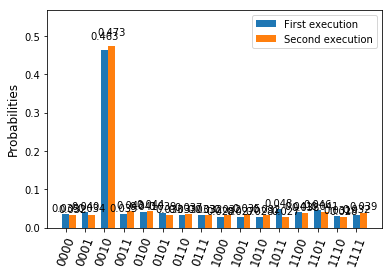

In [8]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import available_backends, execute, Aer, backends
from qiskit.tools.visualization import plot_histogram, circuit_drawer, plot_state
import math

# decide, on which backend you want to run the grover algorithmus
backendIBMQ = False

# define the number n-Qbits
n = 4
N = 2^n
O = math.sqrt(N)
pi = math.pi

try:
    # Create a Quantum-Register with n-Qbits.
    qr = QuantumRegister(n)
    cr = ClassicalRegister(n)
    qc = QuantumCircuit(qr, cr)

    # initialize n-Qbits
    qc.h(qr[0])
    qc.h(qr[1])
    qc.h(qr[2])
    qc.h(qr[3])

    i = 1
    # avarage of O(sqrt(N)) repititions

    # Create oracle for 0010
    qc.x(qr[0])
    qc.x(qr[2])
    qc.x(qr[3])
    qc.cu1(pi/4, qr[0], qr[3])
    qc.cx(qr[0], qr[1])
    qc.cu1(-pi/4, qr[1], qr[3])
    qc.cx(qr[0], qr[1])
    qc.cu1(pi/4, qr[1], qr[3])
    qc.cx(qr[1], qr[2])
    qc.cu1(-pi/4, qr[2], qr[3])
    qc.cx(qr[0], qr[2])
    qc.cu1(pi/4, qr[2], qr[3])
    qc.cx(qr[1], qr[2])
    qc.cu1(-pi/4, qr[2], qr[3])
    qc.cx(qr[0], qr[2])
    qc.cu1(pi/4, qr[2], qr[3])
    qc.x(qr[0])
    qc.x(qr[2])
    qc.x(qr[3])

    # Amplification
    qc.h(qr[0])
    qc.h(qr[1])
    qc.h(qr[2])
    qc.h(qr[3])
    qc.x(qr[0])
    qc.x(qr[1])
    qc.x(qr[2])
    qc.x(qr[3])
        ######## cccZ #########
    qc.cu1(pi/4, qr[0], qr[3])
    qc.cx(qr[0], qr[1])
    qc.cu1(-pi/4, qr[1], qr[3])
    qc.cx(qr[0], qr[1])
    qc.cu1(pi/4, qr[1], qr[3])
    qc.cx(qr[1], qr[2])
    qc.cu1(-pi/4, qr[2], qr[3])
    qc.cx(qr[0], qr[2])
    qc.cu1(pi/4, qr[2], qr[3])
    qc.cx(qr[1], qr[2])
    qc.cu1(-pi/4, qr[2], qr[3])
    qc.cx(qr[0], qr[2])
    qc.cu1(pi/4, qr[2], qr[3])
       ####### end cccZ #######
    qc.x(qr[0])
    qc.x(qr[1])
    qc.x(qr[2])
    qc.x(qr[3])
    qc.h(qr[0])
    qc.h(qr[1])
    qc.h(qr[2])
    qc.h(qr[3])

    i += 1
        
    # Measure: take state from Qbit to Cbit
    qc.barrier(qr)
    qc.measure(qr[0], cr[0])
    qc.measure(qr[1], cr[1])
    qc.measure(qr[2], cr[2])
    qc.measure(qr[3], cr[3])
    
except QISKitError as ex:
        print('There was an error in the circuit!. Error = {}'.format(ex))

# run the code on a real quantumcomputer from IBM
if backendIBMQ:
    # Authenticate for access to remote backends
    try:
        import Qconfig
        IBMQ.load_accounts()    
        try:
            # See a list of available local simulators
            least_busy_device = least_busy(IBMQ.backends(simulator=False))
            print("Running on current least busy device: ", least_busy_device)

            #running the job twice and get counts
            result_exp1 = execute(qc, least_busy_device, shots = 500, max_credits = 10).result()
            result_exp2 = execute(qc, least_busy_device, shots = 500, max_credits = 10).result()
            counts01 = result_exp1.get_counts(qc)
            counts02 = result_exp2.get_counts(qc)

            # Show the results
            print("First experiment: ", result_exp1)
            print("Output: ", counts01)
            print("Second experiment: ", result_exp2)
            print("Output: ", counts02)
            legend = ['First experiment', 'Second experiment']
            plot_histogram([counts01, counts02], legend=legend)
            circuit_drawer(qc)
        except:
            print("All devices are currently unavailable. Try again later.")
    except:
        print("""WARNING: There's no connection with the API for remote backends.
                 Have you initialized a file with your personal token?
                 For now, there's only access to local simulator backends...""")
        
# or run the code on your own system with the simulation backend Aer
else:
    # See a list of available local simulators
    print("Aer backends: ", Aer.backends())
    backend_sim = Aer.get_backend('qasm_simulator')

    # Compile and run the Quantum circuit on a simulator backend
    sim_result1 = execute(qc, backend_sim, shots=1000).result()
    sim_result2 = execute(qc, backend_sim, shots=1000).result()
    counts1 = sim_result1.get_counts(qc)
    counts2 = sim_result2.get_counts(qc)

    # Show the results as text and plot
    print("First simulation: ", sim_result1)
    print("Output: ", counts1)
    print("Second simulation: ", sim_result2)
    print("Output: ", counts2)
    legend = ['First execution', 'Second execution']
    plot_histogram([counts1,counts2], legend=legend)
    circuit_drawer(qc)